<a href="https://colab.research.google.com/github/hydekage/Sistem-Automasi/blob/master/Analisis_Sistem_Response.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Control System Library #

Mulai dengan instalasi library control system pada python

In [17]:
!pip install control

## Analisis Respon Sistem dengan Orde 1##

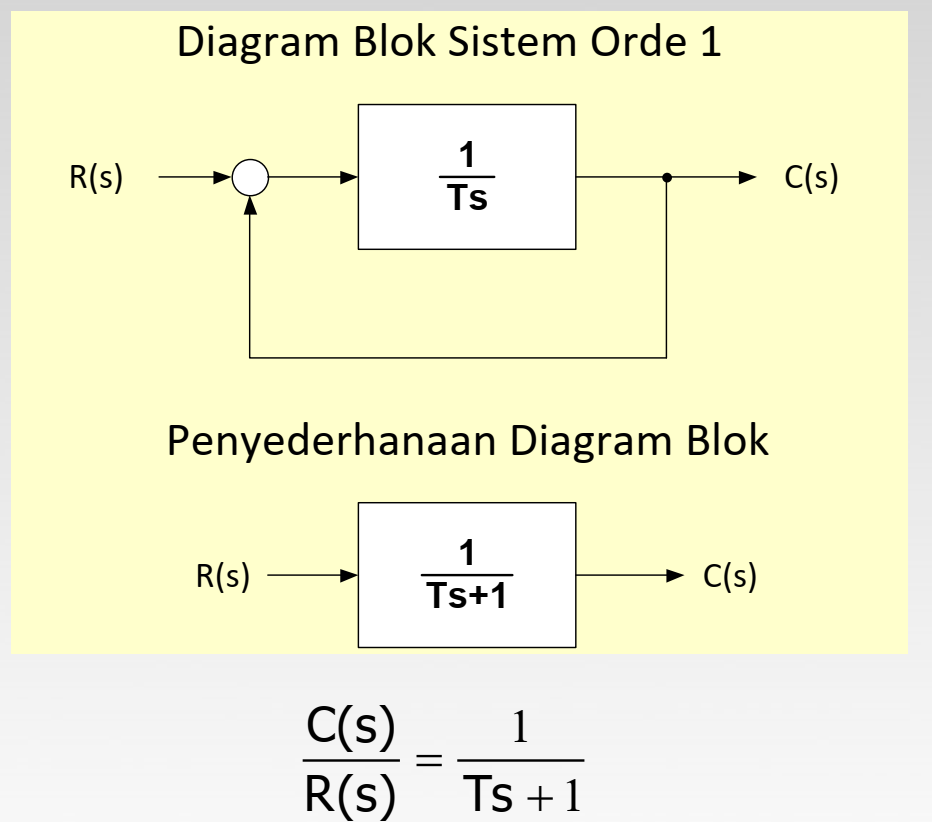

## Manualisasi dengan Symbolic Python ##

'Fungsi Alih Sistem Orde 1:'

1/(T*s + 1)

Step response y(t) = Heaviside(t) - exp(-t)*Heaviside(t)
Impulse response y(t) = exp(-t)*Heaviside(t)


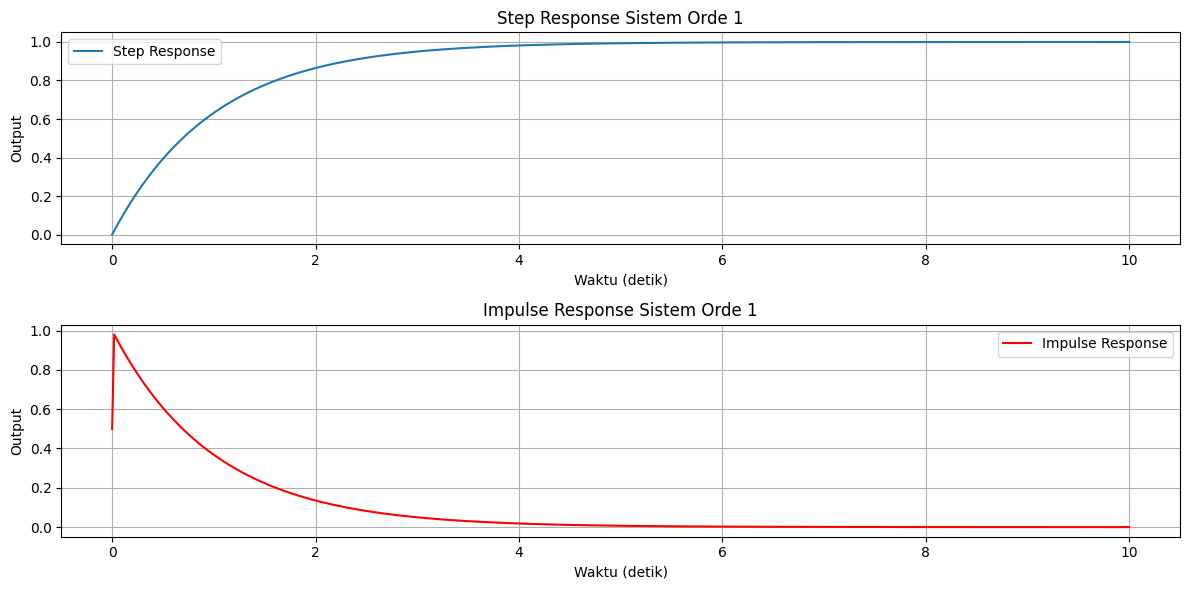

In [26]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

# Definisikan variabel
t, s, T = sp.symbols('t s T')

# Transfer function sistem orde 1
T_const = 1  # misal konstanta waktu T = 1
G_s = 1 / (T * s + 1)  # G(s) = 1/(Ts+1)
display("Fungsi Alih Sistem Orde 1:",G_s)
G_s = G_s.subs(T,T_const)

# --- Step Response ---
# Input step di Laplace = 1/s
U_step = 1 / s

# Output di Laplace
Y_step_s = G_s * U_step

# Inverse Laplace untuk dapatkan y(t)
y_step_t = sp.inverse_laplace_transform(Y_step_s, s, t)
print("Step response y(t) =", y_step_t)

# --- Impulse Response ---
# Input impulse di Laplace = 1 (karena Laplace dari delta(t) = 1)
U_impulse = 1

# Output di Laplace
Y_impulse_s = G_s * U_impulse

# Inverse Laplace untuk dapatkan y(t)
y_impulse_t = sp.inverse_laplace_transform(Y_impulse_s, s, t)
print("Impulse response y(t) =", y_impulse_t)

# --- Evaluasi untuk plot ---
# Konversi fungsi simbolik ke fungsi numerik
f_step = sp.lambdify(t, y_step_t, 'numpy')
f_impulse = sp.lambdify(t, y_impulse_t, 'numpy')

# Vektor waktu untuk plot
t_vals = np.linspace(0, 10, 500)

# Hitung nilai
y_step_vals = f_step(t_vals)
y_impulse_vals = f_impulse(t_vals)

# --- Plot ---
plt.figure(figsize=(12, 6))

# Step Response
plt.subplot(2,1,1)
plt.plot(t_vals, y_step_vals, label='Step Response')
plt.title('Step Response Sistem Orde 1')
plt.xlabel('Waktu (detik)')
plt.ylabel('Output')
plt.grid(True)
plt.legend()

# Impulse Response
plt.subplot(2,1,2)
plt.plot(t_vals, y_impulse_vals, label='Impulse Response', color='red')
plt.title('Impulse Response Sistem Orde 1')
plt.xlabel('Waktu (detik)')
plt.ylabel('Output')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


## Dengan menggunakan Control System Library ##

Menggambarkan step response dan impulse response

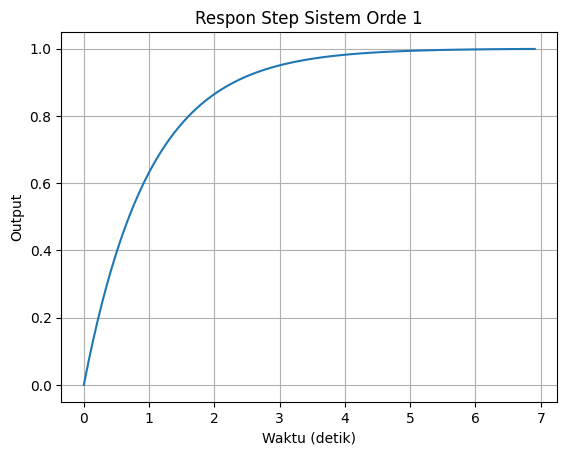

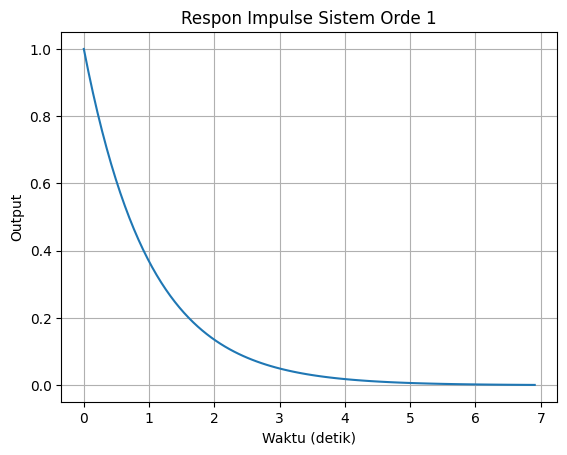

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Definisikan parameter sistem orde 1
T = 1  # Time constant (contoh: 2 detik)
G = ctrl.TransferFunction([1], [T, 1])  # G(s) = 1 / (Ts + 1)


# Simulasi respon terhadap input step
t1, y1 = ctrl.step_response(G)
t2, y2 = ctrl.impulse_response(G)

# Plot hasil respon
plt.figure()
plt.plot(t1, y1)
plt.title('Respon Step Sistem Orde 1')
plt.xlabel('Waktu (detik)')
plt.ylabel('Output')
plt.grid()
plt.show()
plt.plot(t2, y2)
plt.title('Respon Impulse Sistem Orde 1')
plt.xlabel('Waktu (detik)')
plt.ylabel('Output')
plt.grid()
plt.show()


## Manualisasi Sistem Orde 2 ##

Step Response y(t) = 9*(-0.0641500299099584*exp(-1.5*t)*sin(2.59807621135332*t) - 0.111111111111111*exp(-1.5*t)*cos(2.59807621135332*t))*Heaviside(t) + 1.0*Heaviside(t)
Impulse Response y(t) = 3.46410161513775*exp(-1.5*t)*sin(2.59807621135332*t)*Heaviside(t)


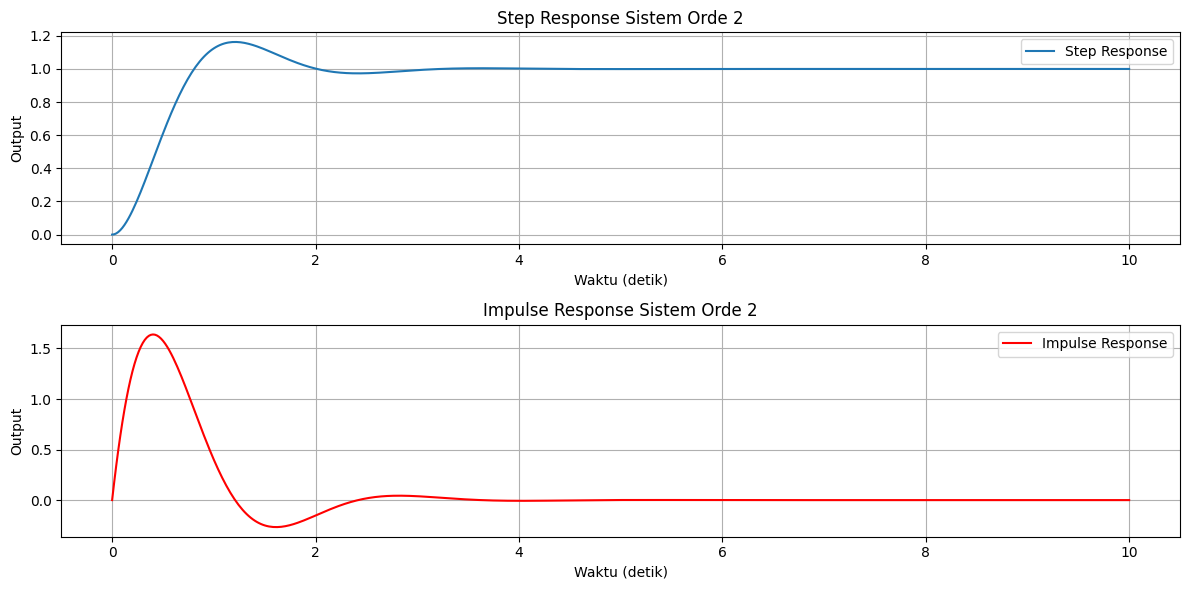

In [27]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definisikan variabel
t, s = sp.symbols('t s')

# Definisikan parameter sistem
omega_n_val = 3  # contoh: natural frequency 3 rad/s
zeta_val = 0.5   # contoh: damping ratio 0.5 (underdamped)

# Definisikan Transfer Function G(s) sistem orde 2
G_s = (omega_n_val**2) / (s**2 + 2*zeta_val*omega_n_val*s + omega_n_val**2)

# --- Step Response ---
U_step = 1 / s  # input step di Laplace

# Output Laplace domain
Y_step_s = G_s * U_step

# Inverse Laplace untuk dapatkan y_step(t)
y_step_t = sp.inverse_laplace_transform(Y_step_s, s, t)
print("Step Response y(t) =", y_step_t)

# --- Impulse Response ---
U_impulse = 1  # input impulse di Laplace (delta(t))

# Output Laplace domain
Y_impulse_s = G_s * U_impulse

# Inverse Laplace untuk dapatkan y_impulse(t)
y_impulse_t = sp.inverse_laplace_transform(Y_impulse_s, s, t)
print("Impulse Response y(t) =", y_impulse_t)

# --- Evaluasi untuk Plot ---
# Konversi fungsi simbolik ke fungsi numerik
f_step = sp.lambdify(t, y_step_t, 'numpy')
f_impulse = sp.lambdify(t, y_impulse_t, 'numpy')

# Waktu simulasi
t_vals = np.linspace(0, 10, 500)

# Hitung nilai output
y_step_vals = f_step(t_vals)
y_impulse_vals = f_impulse(t_vals)

# --- Plot Hasil ---
plt.figure(figsize=(12, 6))

# Step Response
plt.subplot(2, 1, 1)
plt.plot(t_vals, y_step_vals, label='Step Response')
plt.title('Step Response Sistem Orde 2')
plt.xlabel('Waktu (detik)')
plt.ylabel('Output')
plt.grid(True)
plt.legend()

# Impulse Response
plt.subplot(2, 1, 2)
plt.plot(t_vals, y_impulse_vals, label='Impulse Response', color='red')
plt.title('Impulse Response Sistem Orde 2')
plt.xlabel('Waktu (detik)')
plt.ylabel('Output')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


## Sistem Orde 2 dengan menggunakan Control System Library ##

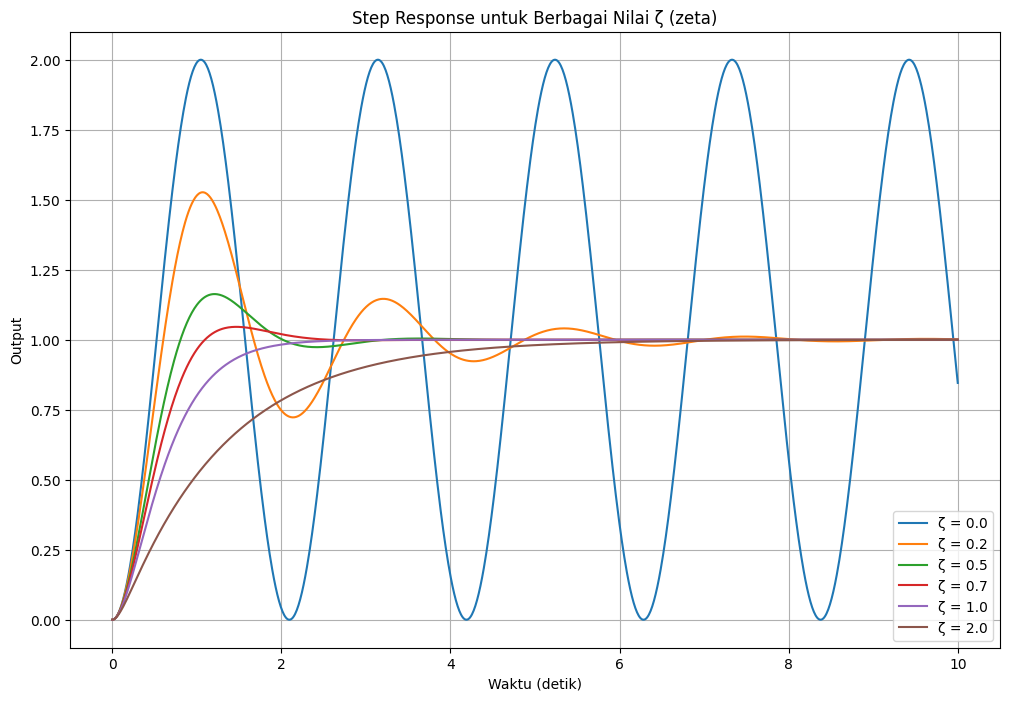

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Definisikan parameter tetap
omega_n = 3  # Natural frequency (rad/s)

# Definisikan variasi nilai zeta
zeta_values = [0.0, 0.2, 0.5, 0.7, 1.0, 2.0]  # Undamped, underdamped, critically damped, overdamped

# Waktu simulasi
t = np.linspace(0, 10, 1000)

# Buat plot
plt.figure(figsize=(12, 8))

for zeta in zeta_values:
    # Buat Transfer Function untuk setiap zeta
    numerator = [omega_n**2]
    denominator = [1, 2*zeta*omega_n, omega_n**2]
    G = ctrl.TransferFunction(numerator, denominator)

    # Simulasi step response
    t_out, y_out = ctrl.step_response(G, T=t)

    # Plot
    plt.plot(t_out, y_out, label=f'ζ = {zeta}')

# Setting plot
plt.title('Step Response untuk Berbagai Nilai ζ (zeta)')
plt.xlabel('Waktu (detik)')
plt.ylabel('Output')
plt.grid(True)
plt.legend()
plt.show()
